# Automated updates made
The following string replacements were applied (best-effort):
- `sns.distplot(` → `sns.histplot(` (approx occurrences replaced: 8)
- `seaborn.distplot(` → `seaborn.histplot(` (approx occurrences replaced: 0)
- `plt.histplot(` → `plt.hist(` (approx occurrences replaced: 0)
- `pd.scatter_matrix(` → `pd.plotting.scatter_matrix(` (approx occurrences replaced: 0)
- `from pandas.tools.plotting import scatter_matrix` → `from pandas.plotting import scatter_matrix` (approx occurrences replaced: 0)
- `sns.kdeplot(` → `sns.kdeplot(` (approx occurrences replaced: 0)

If some visualizations still fail, they may use custom plotting code—open the notebook and search for the plotting lines.

Import of all the required libraries

In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Create a dataframe

In [3]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
dataframe.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


Missing values in a given dataset

In [6]:
dataframe.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1




*   Data Imputation of 0's in every feature

*   Size of the data






In [8]:
dataframe.shape

(768, 9)



*   Target Column: Outcome[0,1] (Binary Classification Task)
*   As the target column is available in the dataset, supervised machine learning algorithm.
*   Records: 768





Correlation Coefficient

In [9]:
dataframe.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


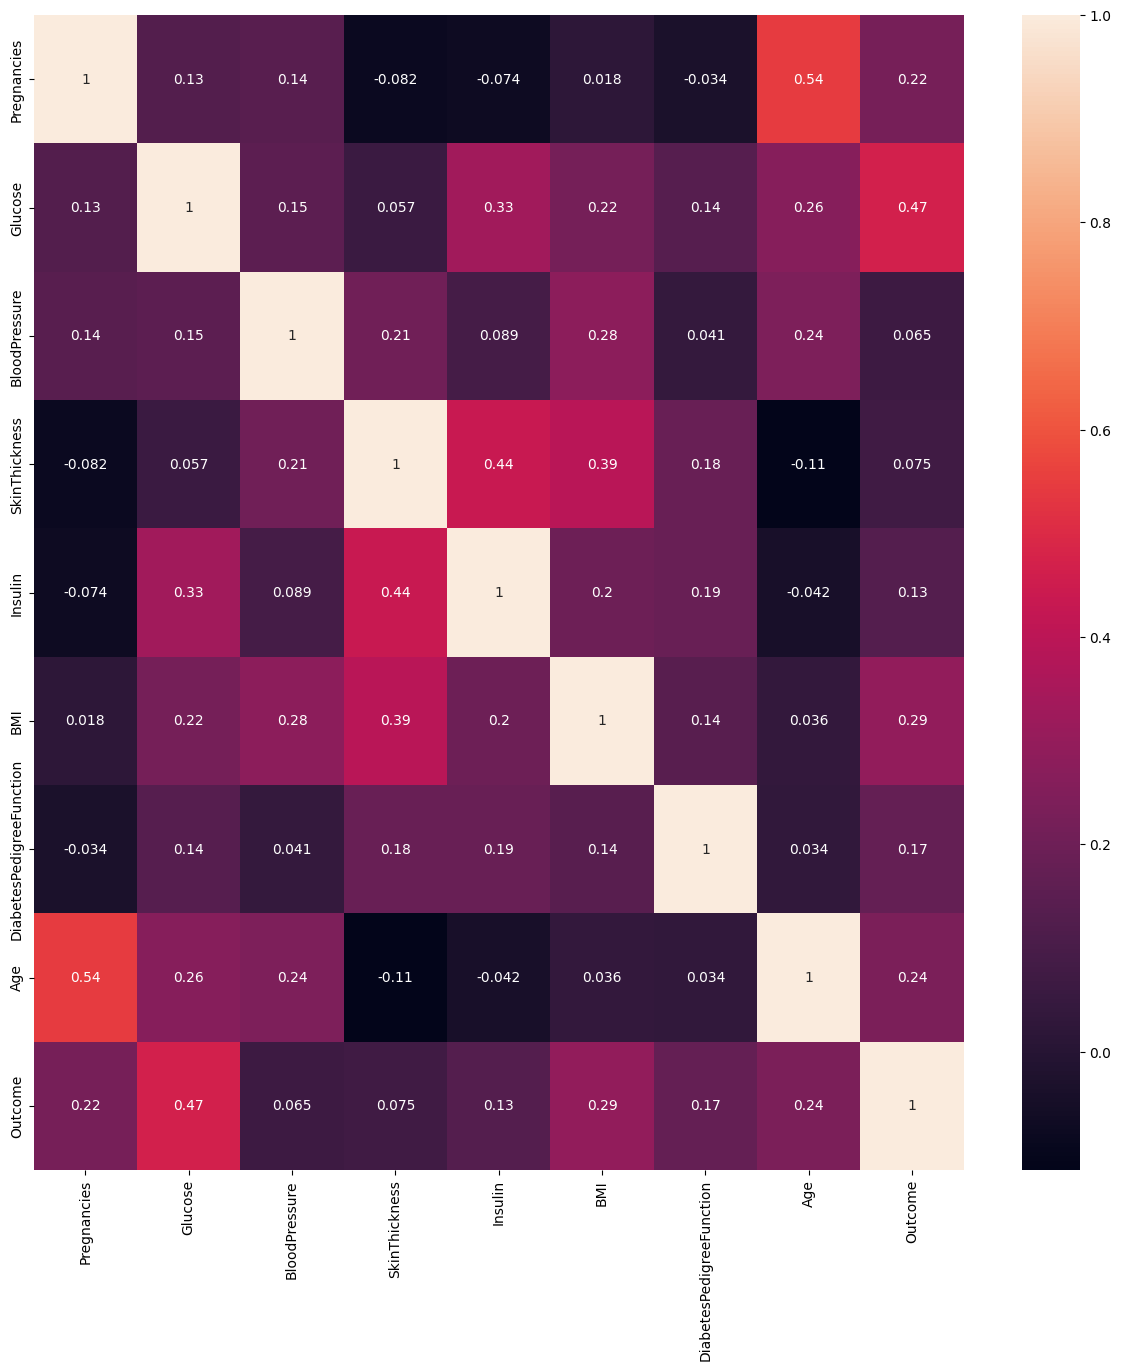

In [10]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(dataframe.corr(), annot=True)
plt.savefig('correlation-coefficient.jpg')
plt.show()

Descriptive Statistics of the given data

In [11]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data Imputation

<Axes: xlabel='Pregnancies', ylabel='Count'>

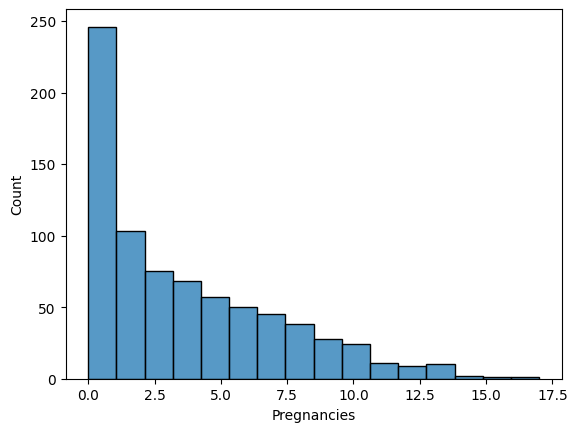

In [12]:
# Pregnancies -> Median
sns.histplot(dataframe.Pregnancies)

<Axes: xlabel='BloodPressure', ylabel='Count'>

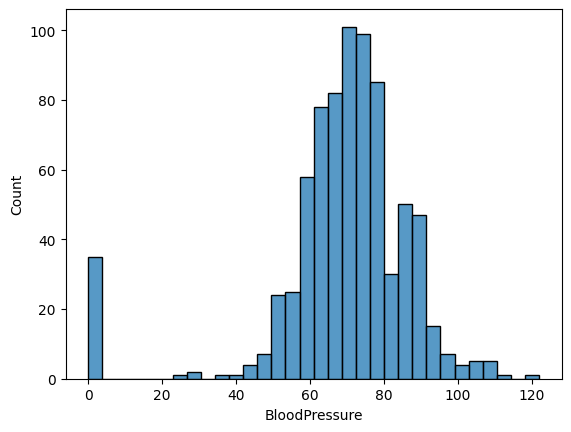

In [13]:
## BP -> Mean
sns.histplot(dataframe.BloodPressure)

<Axes: xlabel='Insulin', ylabel='Count'>

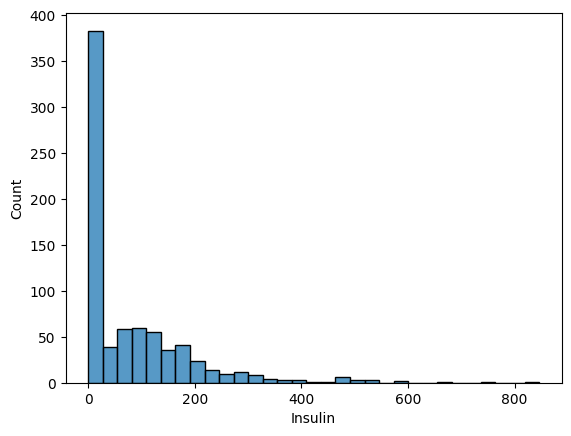

In [14]:
# Insulin -> Median
sns.histplot(dataframe.Insulin)

In [15]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
## Insuline -> Right skewed distribution
dataframe['Insulin'] = dataframe['Insulin'].replace(0, dataframe['Insulin'].median())

<Axes: xlabel='Glucose', ylabel='Count'>

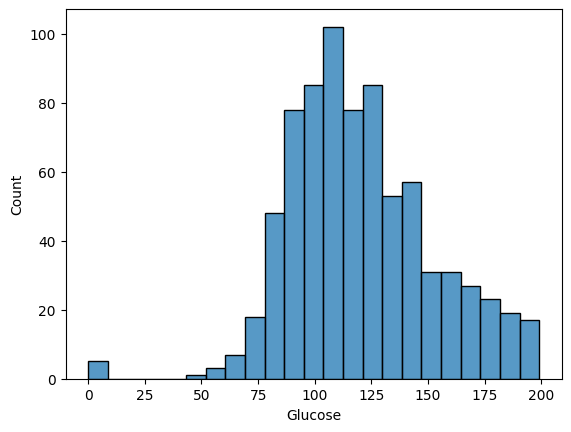

In [17]:
sns.histplot(dataframe.Glucose)

<Axes: xlabel='BMI', ylabel='Count'>

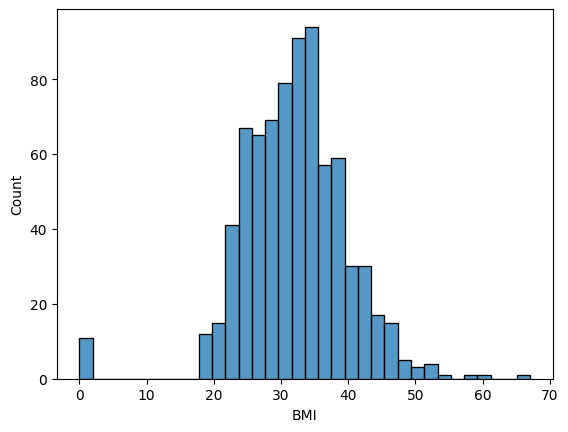

In [18]:
sns.histplot(dataframe.BMI)

<Axes: xlabel='SkinThickness', ylabel='Count'>

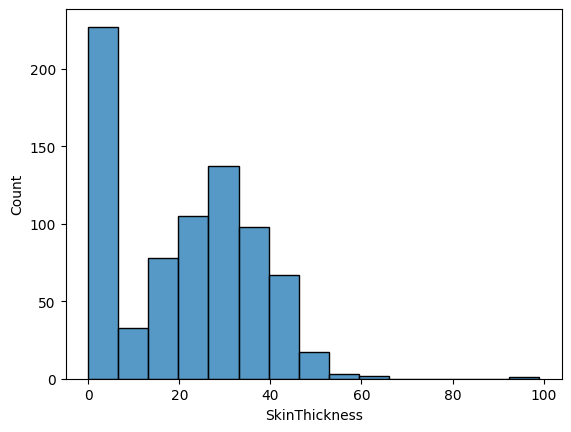

In [19]:
sns.histplot(dataframe.SkinThickness)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

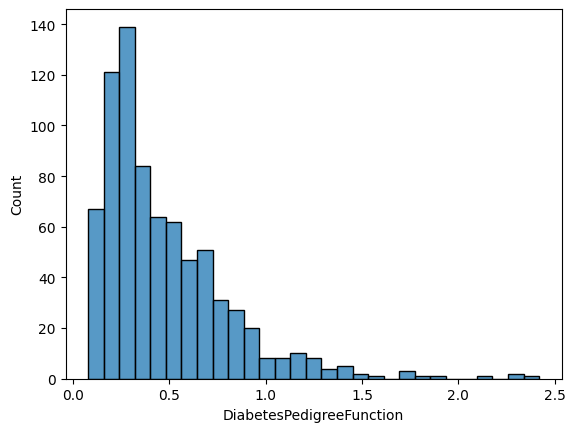

In [20]:
sns.histplot(dataframe.DiabetesPedigreeFunction)

<Axes: xlabel='Age', ylabel='Count'>

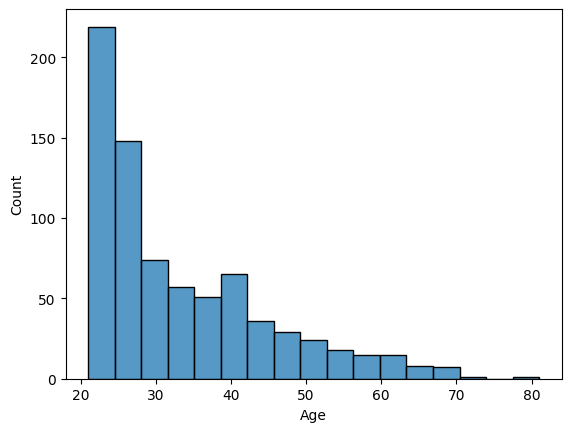

In [21]:
sns.histplot(dataframe.Age)

In [22]:
dataframe['Pregnancies'] = dataframe['Pregnancies'].replace(0, dataframe['Pregnancies'].median())
dataframe['Glucose'] = dataframe['Glucose'].replace(0, dataframe['Glucose'].mean())
dataframe['BloodPressure'] = dataframe['BloodPressure'].replace(0, dataframe['BloodPressure'].mean())
dataframe['SkinThickness'] = dataframe['SkinThickness'].replace(0, dataframe['SkinThickness'].median())
dataframe['BMI'] = dataframe['BMI'].replace(0, dataframe['BMI'].mean())
dataframe['DiabetesPedigreeFunction'] = dataframe['DiabetesPedigreeFunction'].replace(0, dataframe['DiabetesPedigreeFunction'].median())
dataframe['Age'] = dataframe['Age'].replace(0, dataframe['Age'].median())

In [23]:
dataframe.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35,30.5,33.600000,0.627,50,1
1,1,85.0,66.000000,29,30.5,26.600000,0.351,31,0
2,8,183.0,64.000000,23,30.5,23.300000,0.672,32,1
3,1,89.0,66.000000,23,94.0,28.100000,0.167,21,0
4,3,137.0,40.000000,35,168.0,43.100000,2.288,33,1
5,5,116.0,74.000000,23,30.5,25.600000,0.201,30,0
6,3,78.0,50.000000,32,88.0,31.000000,0.248,26,1
7,10,115.0,69.105469,23,30.5,35.300000,0.134,29,0
8,2,197.0,70.000000,45,543.0,30.500000,0.158,53,1
9,8,125.0,96.000000,23,30.5,31.992578,0.232,54,1




*   Descriptive Statistics and it's significance
*   Correlation Coefficient and it's significance
*   Types of Distribution and it's significance
*   Median is more robuts to outliers and why
*   Data Imputation via Mean and Median(Numeric Data) => Symmetric -> Mean and Skewed -> Median, Categorical Data => Mode

In [24]:
## X -> input features y -> target value
X = dataframe.drop(columns='Outcome', axis=1)
y = dataframe['Outcome']

Outlier Detection -> Box Plot

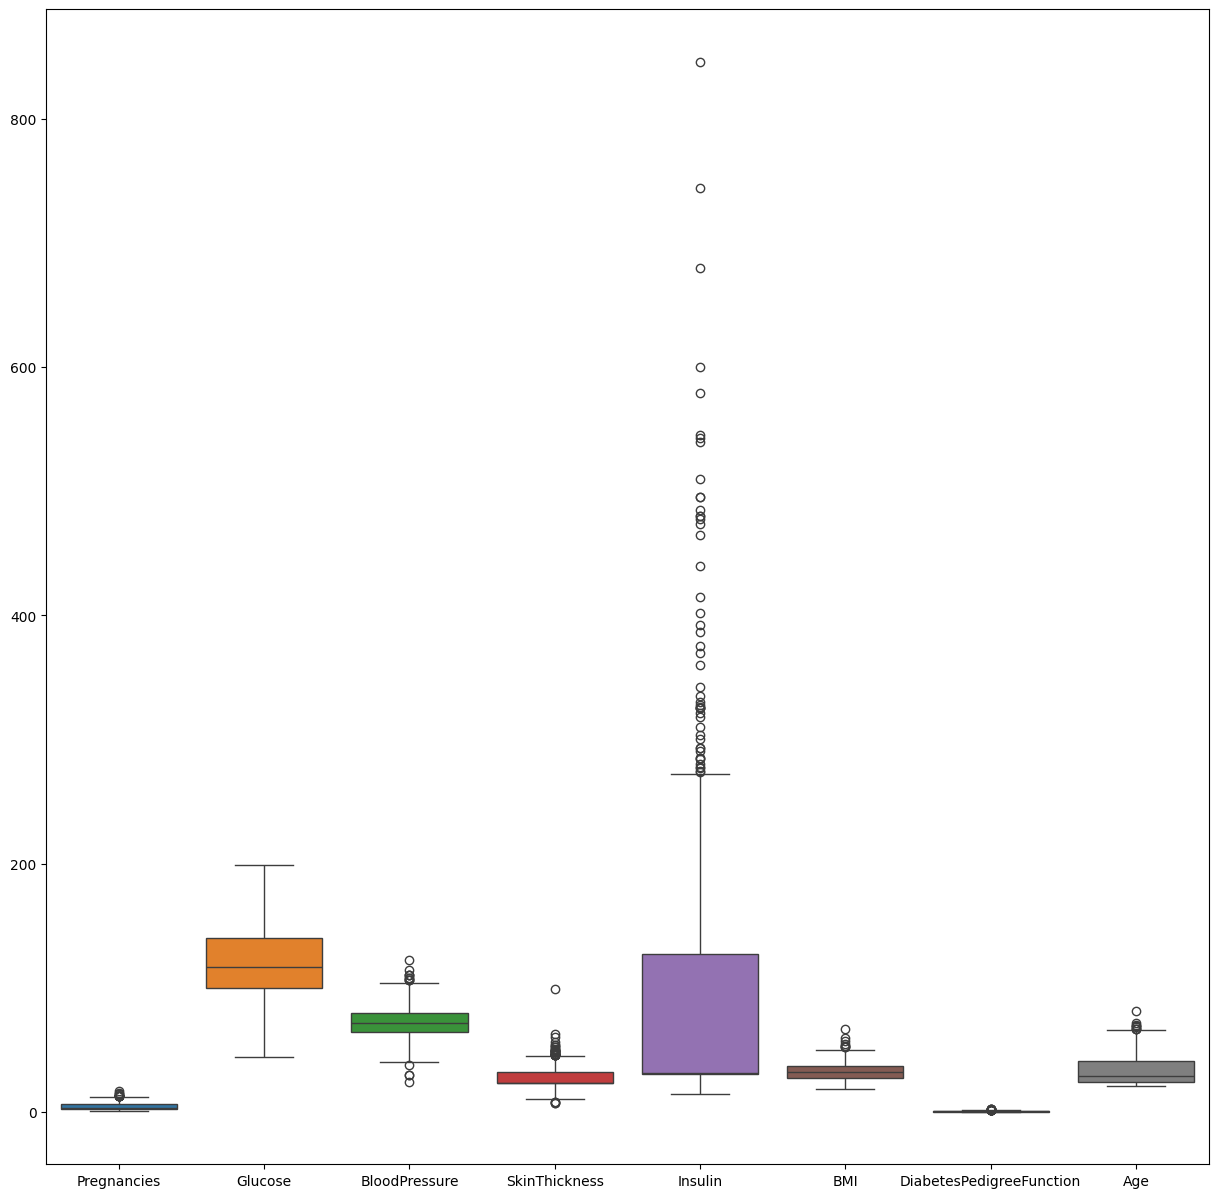

In [25]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = X, ax=ax)
plt.savefig('boxPlot.jpg')

In [26]:
X.shape

(768, 8)

In [27]:
y.shape

(768,)

In [28]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)

In [29]:
X_outlier_detection = X[mask]
y_outlier_detection = y[mask]

In [30]:
X_outlier_detection.shape

(759, 8)

In [31]:
y_outlier_detection.shape

(759,)

Standardization

Standard Normal Form -> Mean = 0 and standard deviation = 1

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outlier_detection)

In [33]:
X_scaled

array([[ 0.57322173,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-1.0797999 , -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23443039,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.2426174 , -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-1.0797999 ,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-1.0797999 , -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

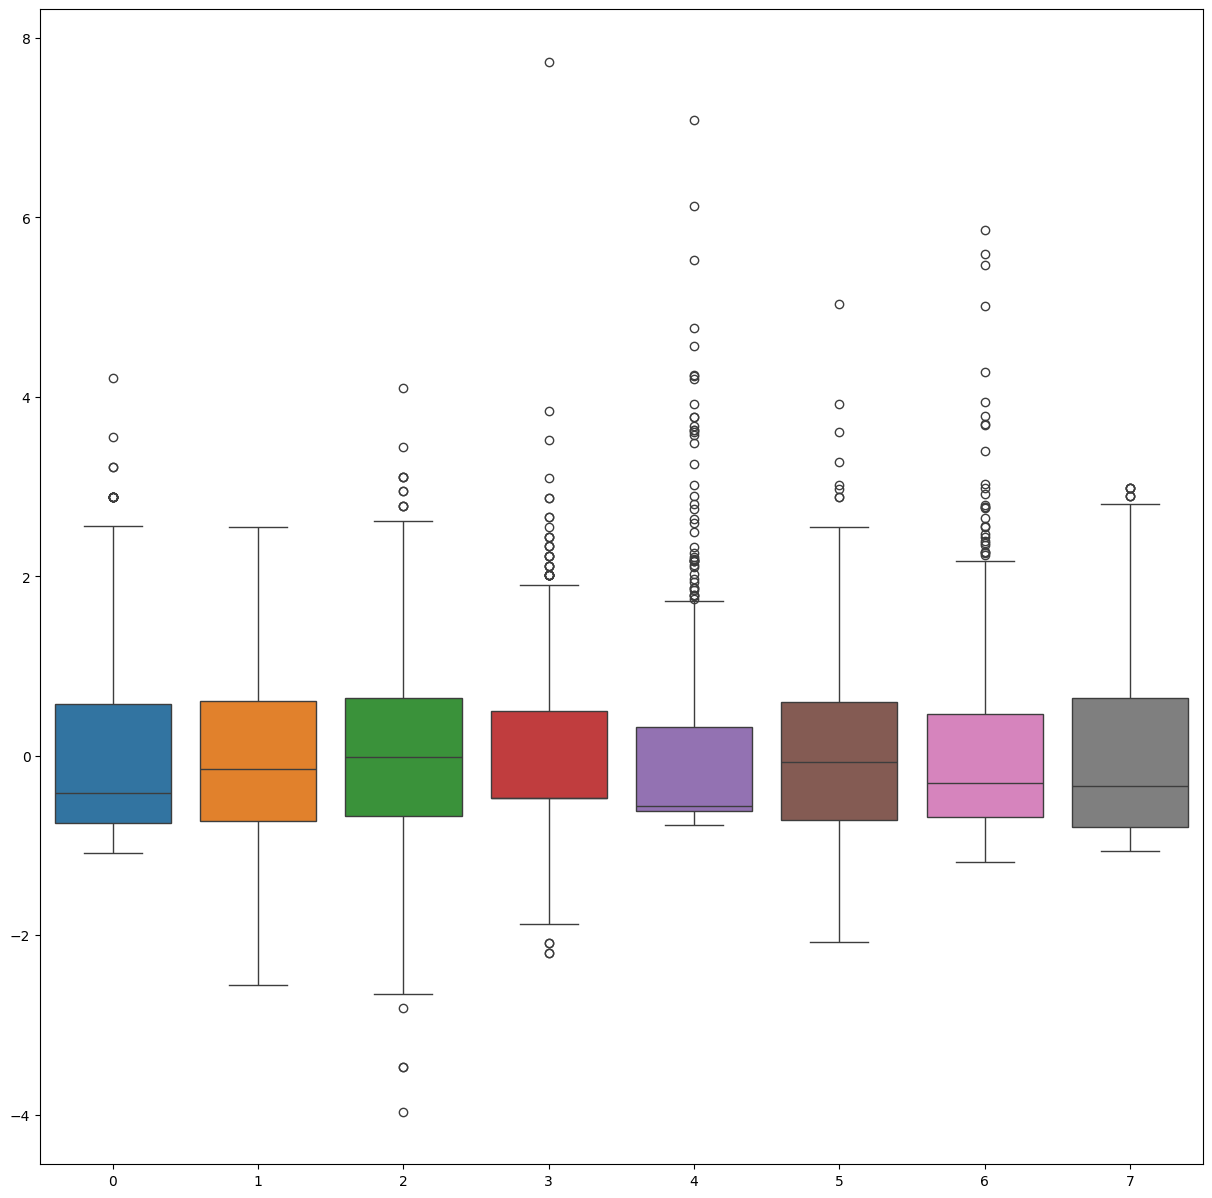

In [34]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = X_scaled, ax=ax)
plt.savefig('boxPlot.jpg')

In [35]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [36]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [37]:
type(X_scaled)

numpy.ndarray

In [38]:
X_scaled = pd.DataFrame(X_scaled, columns=cols)
X_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02,7.590000e+02
mean,1.029772e-16,-3.978665e-17,-3.042508e-17,-1.509552e-16,-4.329724e-17,5.546727e-16,4.914821e-17,1.591466e-16
std,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00,1.000659e+00
min,-1.079800e+00,-2.558042e+00,-3.968588e+00,-2.200901e+00,-7.684941e-01,-2.081038e+00,-1.183313e+00,-1.062953e+00
25%,-7.491956e-01,-7.286101e-01,-6.755847e-01,-4.729631e-01,-6.126688e-01,-7.125819e-01,-6.852739e-01,-7.928253e-01
50%,-4.185912e-01,-1.517621e-01,-1.698412e-02,-4.729631e-01,-5.607270e-01,-7.202795e-02,-3.045975e-01,-3.426125e-01
75%,5.732217e-01,6.063810e-01,6.416165e-01,4.990017e-01,3.222827e-01,5.976421e-01,4.627740e-01,6.478556e-01
max,4.209869e+00,2.551183e+00,4.099270e+00,7.734740e+00,7.088876e+00,5.037846e+00,5.864467e+00,2.988962e+00





*   Approach 2 of quantiles to remove the outliers
*   Handling of imbalanced data




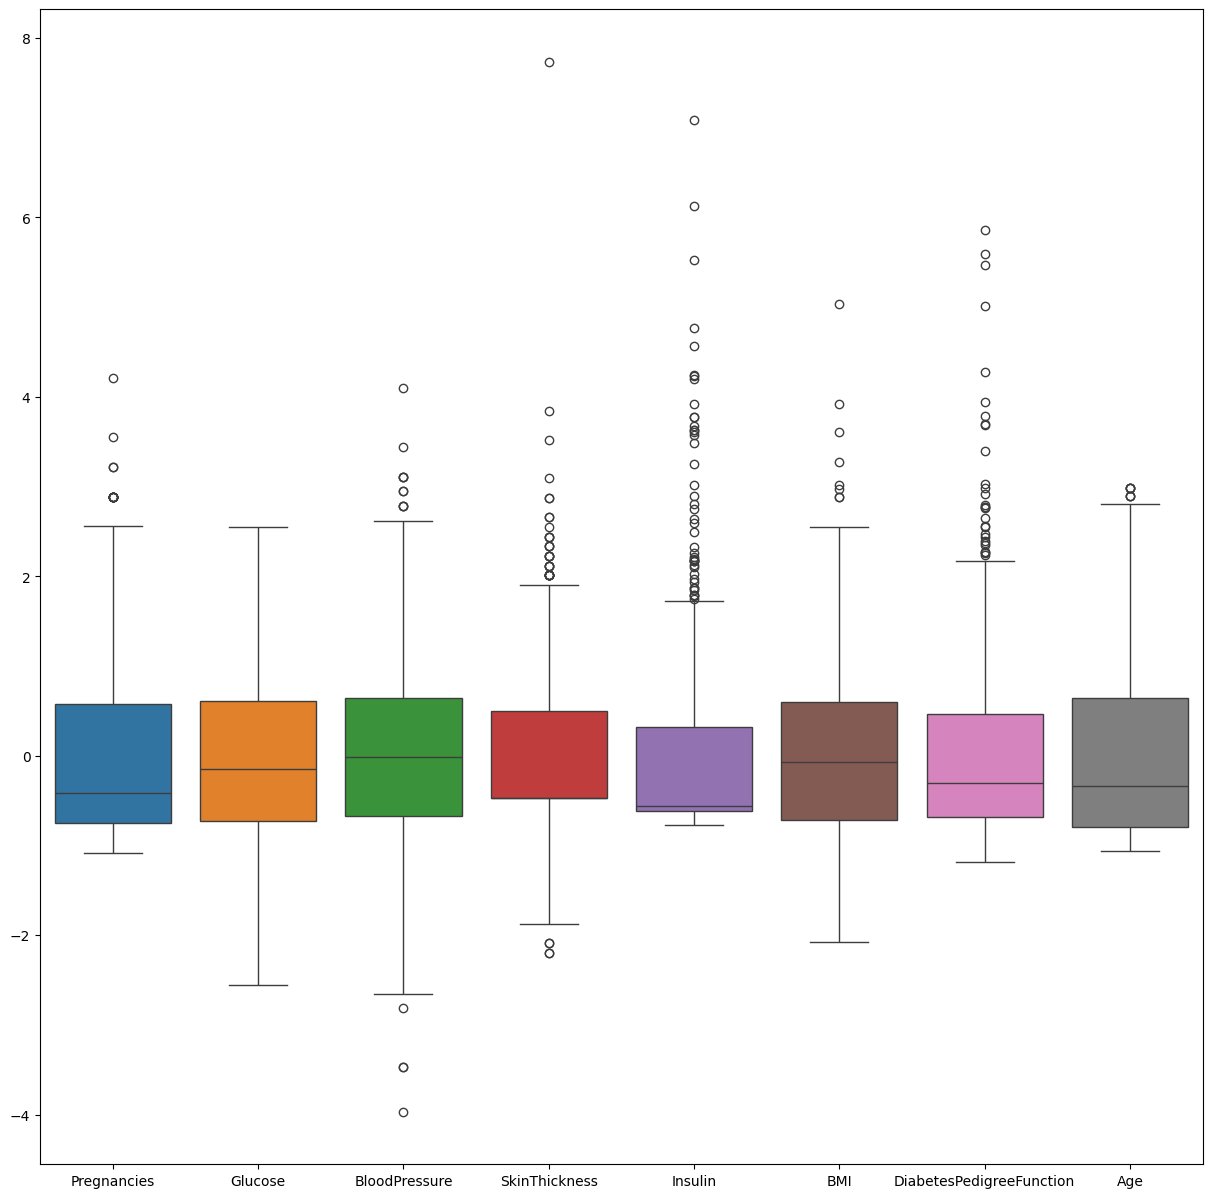

In [39]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = X_scaled, ax=ax)
plt.savefig('boxPlot.jpg')

In [40]:
y_outlier_detection.shape

(759,)

In [41]:
y_outlier_detection.value_counts()

,count
Outcome,
0,493
1,266


Concluding:


*  Detection of the outliers
*  Normalization via StandardScaler Form & Why it is important(reduce the biasness in the model)



Approach 2: Quantiles

In [42]:
X_scaled.reset_index(drop=True, inplace=True)
y_outlier_detection.reset_index(drop=True, inplace=True)

In [43]:
q = X_scaled['Insulin'].quantile(.95)
mask = X_scaled['Insulin'] < q
dataNew = X_scaled[mask]
y_outlier_detection = y_outlier_detection[mask]

In [44]:
dataNew.shape

(721, 8)

In [45]:
y_outlier_detection.shape

(721,)

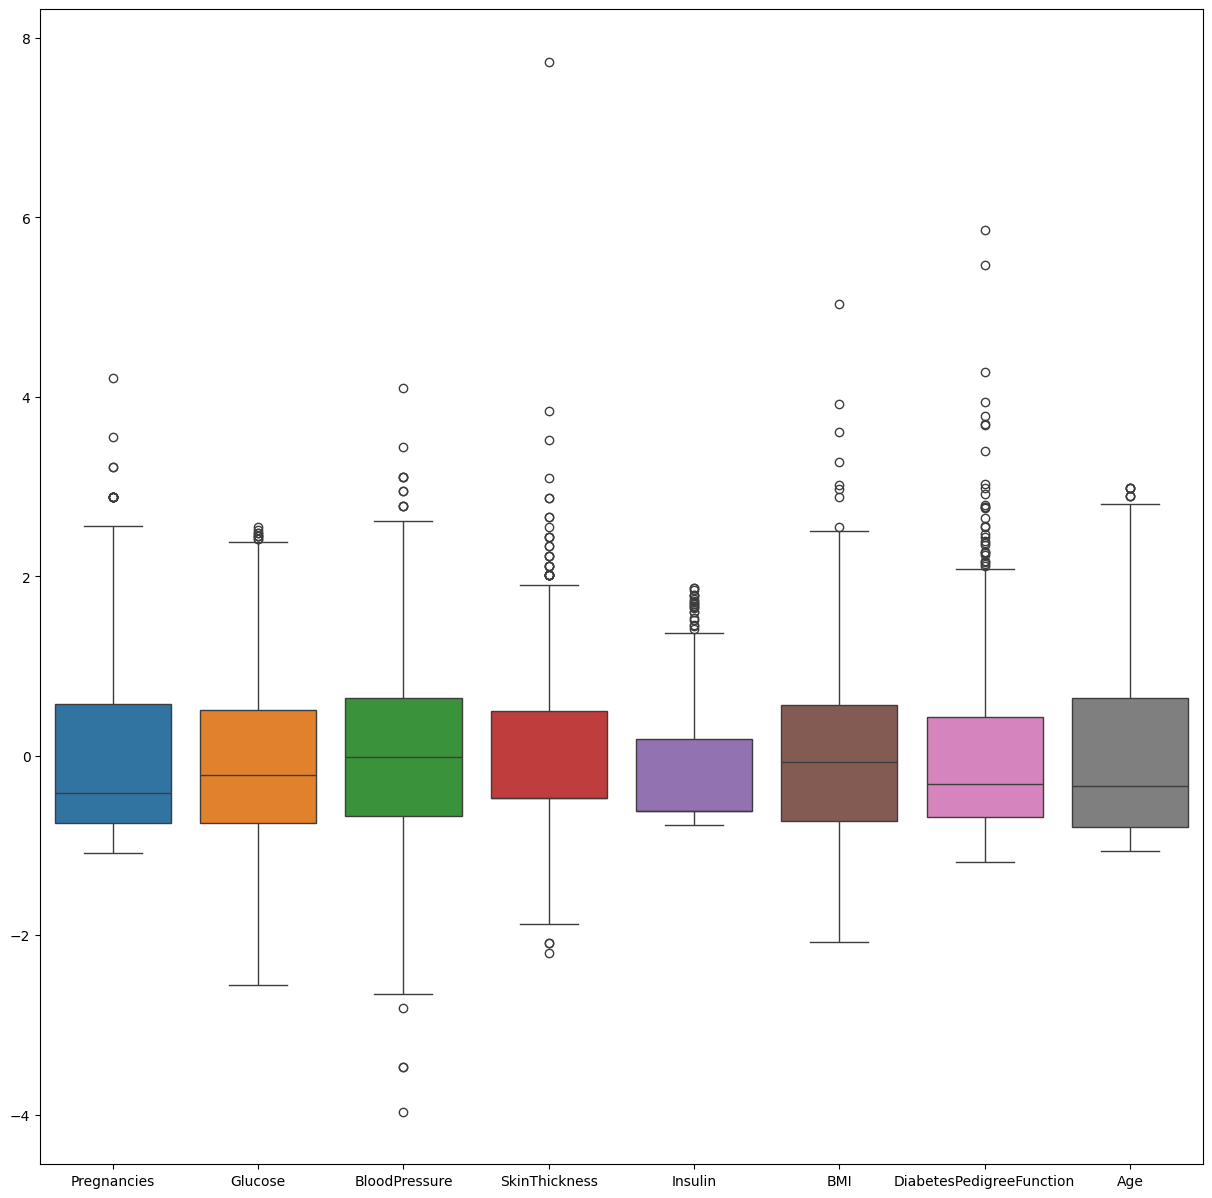

In [46]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.boxplot(data = dataNew, ax=ax)
plt.savefig('boxPlot.jpg')

Model Training

Splitting of data into training and testing

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataNew, y_outlier_detection, test_size=0.33, random_state=42)

In [48]:
X_train.shape

(483, 8)

In [49]:
X_test.shape

(238, 8)

Data Imbalancing



*   Oversampling : Minority Class and increase that number to the majority class
*   Undersampling : Majority class and decrease that number to the minority class
*   SMOTE : Synthetic data and increase the number of samples to the majority class






In [50]:
y_train.value_counts()

,count
Outcome,
0,318
1,165


SMOTE Technique

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check resampled class distribution
print("\nResampled class distribution:")
print(pd.Series(y_train_resampled).value_counts())


Resampled class distribution:
Outcome
0    318
1    318
Name: count, dtype: int64


In [52]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression()
classification.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

Model Predictions

In [53]:
y_predictions = classification.predict(X_test)
print(y_predictions)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1]


Model Evaluation

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predictions)

0.7478991596638656

Healthcare: Recall is very important metric

In [55]:
from sklearn.metrics import classification_report
target_names = ['Non-Diabetic', 'Diabetic']
print(classification_report(y_test, y_predictions, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetic       0.85      0.76      0.80       159
    Diabetic       0.60      0.72      0.66        79

    accuracy                           0.75       238
   macro avg       0.72      0.74      0.73       238
weighted avg       0.76      0.75      0.75       238



In [56]:
import pickle
pickle.dump(classification, open("classification_model.pkl", "wb"))

In [57]:
classification_model = pickle.load(open("classification_model.pkl", "rb"))
classification_model.predict(X_test)

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

Model Training: KNNClassifier Model

In [58]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier()

In [59]:
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

Model Prediction

In [60]:
y_prediction_knn = knn.predict(X_test)
y_prediction_knn

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1])

In [61]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_prediction_knn))

Confusion Matrix
[[103  56]
 [ 19  60]]


In [62]:
print("Classification Report")
print(classification_report(y_test, y_prediction_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.65      0.73       159
           1       0.52      0.76      0.62        79

    accuracy                           0.68       238
   macro avg       0.68      0.70      0.67       238
weighted avg       0.74      0.68      0.69       238



Data Modeling: Implementation of Naive Bayes Classifier

In [63]:
from sklearn.naive_bayes import GaussianNB
model_gaussian_naive_bayes = GaussianNB()
model_gaussian_naive_bayes.fit(X_train_resampled, y_train_resampled)

GaussianNB()

In [64]:
y_predict_gaussian_naive_bayes = model_gaussian_naive_bayes.predict(X_test)
print(y_predict_gaussian_naive_bayes)

[0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1
 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0]


In [65]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predict_gaussian_naive_bayes))

Confusion Matrix
[[119  40]
 [ 27  52]]


In [66]:
print("Classification Report")
print(classification_report(y_test, y_predict_gaussian_naive_bayes))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       159
           1       0.57      0.66      0.61        79

    accuracy                           0.72       238
   macro avg       0.69      0.70      0.69       238
weighted avg       0.73      0.72      0.72       238



In [67]:
accuracy_score(y_test, y_predict_gaussian_naive_bayes)

0.7184873949579832

## Added models: Decision Tree and SVM
The following code cells were added automatically.

Decision Tree classification report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       159
           1       0.57      0.68      0.62        79

    accuracy                           0.72       238
   macro avg       0.70      0.71      0.70       238
weighted avg       0.74      0.72      0.73       238

Confusion matrix:
[[118  41]
 [ 25  54]]


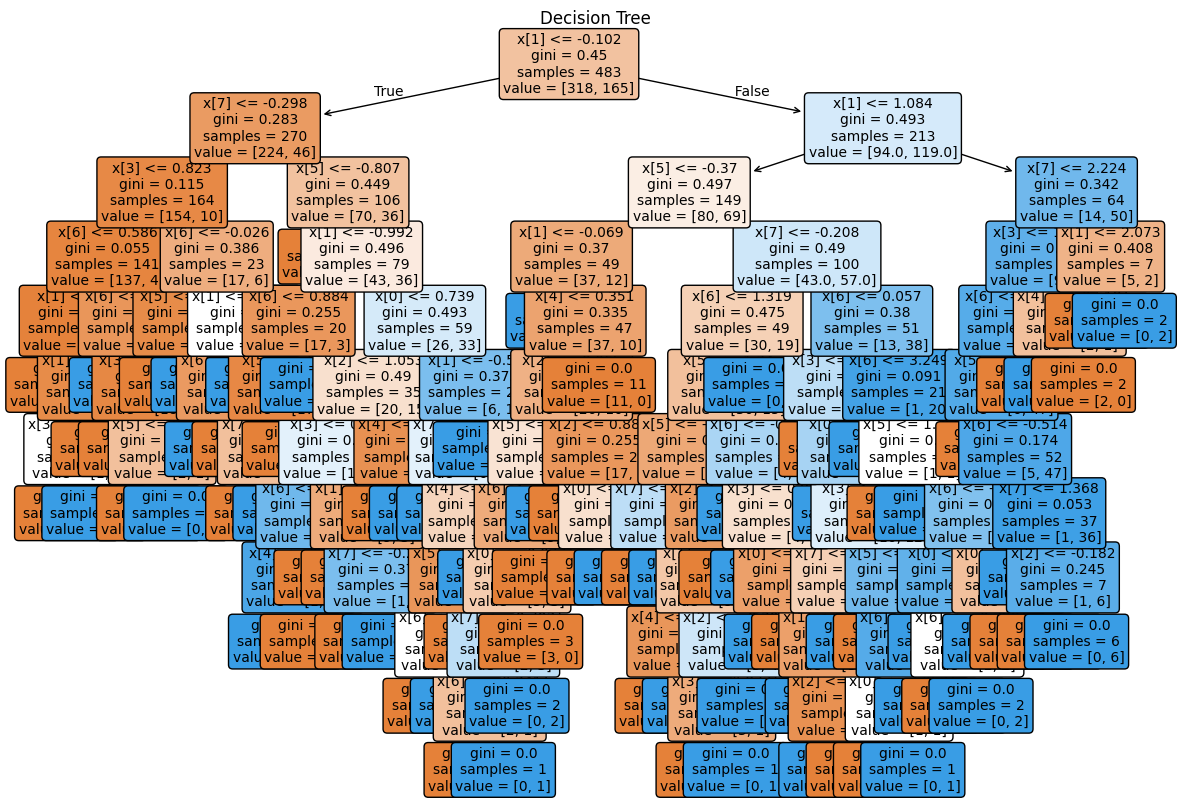

In [68]:

# --- Added: Decision Tree classifier (DecisionTreeClassifier)
# This cell tries to reuse your existing train/test variables (X_train, X_test, y_train, y_test).
# If those aren't present, it will attempt to use X and y and create a train/test split.
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

try:
    # try to use existing train/test variables
    X_train, X_test, y_train, y_test
    using_existing = True
except NameError:
    using_existing = False

if not using_existing:
    try:
        X, y
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if (hasattr(y, '__len__') and len(set(y))>1) else None)
        print("Created X_train/X_test/y_train/y_test from X and y (20% test).")
    except NameError:
        raise RuntimeError("Could not find X_train/X_test/y_train/y_test or X and y. Please ensure your feature matrix is named X and labels y, or run preprocessing cells before this cell.")

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

print('Decision Tree classification report:')
print(classification_report(y_test, y_pred_dt))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_dt))

# Attempt to display the tree. If feature names are available, try to use them.
feature_names = None
if 'feature_names' in globals():
    feature_names = feature_names
elif hasattr(getattr(X_train, 'columns', None), '__iter__'):
    feature_names = list(X_train.columns)

plt.figure(figsize=(14,10))
try:
    plot_tree(dt_clf, filled=True, feature_names=feature_names, class_names=None, rounded=True, fontsize=10)
    plt.title("Decision Tree")
    plt.show()
except Exception as e:
    print("Could not plot the full tree (maybe too deep). Printing feature importances instead.")
    importances = getattr(dt_clf, 'feature_importances_', None)
    if importances is not None:
        for i, imp in enumerate(importances):
            name = feature_names[i] if feature_names and i < len(feature_names) else f"f{i}"
            print(f"{name}: {imp:.4f}")


In [69]:

# --- Added: SVM classifier (SVC) with scaling
# This cell uses StandardScaler before training an SVM. It also reuses X_train/X_test if available.
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

try:
    X_train, X_test, y_train, y_test
    using_existing = True
except NameError:
    using_existing = False

if not using_existing:
    try:
        X, y
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if (hasattr(y, '__len__') and len(set(y))>1) else None)
        print("Created X_train/X_test/y_train/y_test from X and y (20% test).")
    except NameError:
        raise RuntimeError("Could not find X_train/X_test/y_train/y_test or X and y. Please ensure your feature matrix is named X and labels y, or run preprocessing cells before this cell.")

# Build a pipeline with scaling + SVC
svm_pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=False, random_state=42))
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

print('SVM classification report:')
print(classification_report(y_test, y_pred_svm))
print('SVM confusion matrix:')
print(confusion_matrix(y_test, y_pred_svm))


SVM classification report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       159
           1       0.69      0.61      0.64        79

    accuracy                           0.78       238
   macro avg       0.75      0.73      0.74       238
weighted avg       0.77      0.78      0.77       238

SVM confusion matrix:
[[137  22]
 [ 31  48]]


In [70]:
# SVM classifier with GridSearchCV hyperparameter tuning
# Paste this into your Naive Bayes notebook. Requires X_train, X_test, y_train, y_test to be defined.
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np
import scipy.sparse as sp

# --- sanity check
assert all(name in globals() for name in ("X_train","X_test","y_train","y_test")), \
    "Please define X_train, X_test, y_train, y_test before running this cell."

# detect whether X_train is sparse (e.g., TF-IDF)
is_sparse = sp.issparse(X_train)

# Build pipeline: include scaler only for dense numeric features
if is_sparse:
    print("Detected sparse X (likely text features) — skipping StandardScaler in pipeline.")
    pipeline = Pipeline([
        ('svc', SVC(probability=False))
    ])
else:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(probability=False))
    ])

# Parameter grid (adjust as needed)
# Note: when using a Pipeline, estimator named 'svc' is referenced as 'svc__param'
param_grid = [
    # RBF and linear kernels
    {
        'svc__kernel': ['rbf'],
        'svc__C': [0.1, 1, 10, 100],
        'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'svc__class_weight': [None, 'balanced']
    },
    {
        'svc__kernel': ['linear'],
        'svc__C': [0.01, 0.1, 1, 10, 100],
        'svc__class_weight': [None, 'balanced']
    },
    # small grid for polynomial if you want (can be slow)
    {
        'svc__kernel': ['poly'],
        'svc__C': [0.1, 1, 10],
        'svc__degree': [2, 3],
        'svc__gamma': ['scale', 'auto'],
        'svc__class_weight': [None, 'balanced']
    }
]

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
gs = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',      # good for multiclass / imbalanced; use 'accuracy' if you prefer
    cv=cv,
    n_jobs=-1,
    verbose=2,
    refit=True
)

print("Starting GridSearchCV for SVC... this may take a while depending on grid size and data size.")
gs.fit(X_train, y_train)

print("\nBest parameters found:")
print(gs.best_params_)
print(f"Best CV score (f1_macro): {gs.best_score_:.4f}")

# Evaluate best estimator on test set
best = gs.best_estimator_
y_pred = best.predict(X_test)

print("\nClassification report on test set:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the tuned model
try:
    joblib.dump(best, "best_svc_tuned.joblib")
    print("\nSaved best tuned SVC to 'best_svc_tuned.joblib'")
except Exception as e:
    print(f"\nCould not save model: {e}")


Starting GridSearchCV for SVC... this may take a while depending on grid size and data size.
Fitting 5 folds for each of 74 candidates, totalling 370 fits

Best parameters found:
{'svc__C': 0.1, 'svc__class_weight': None, 'svc__kernel': 'linear'}
Best CV score (f1_macro): 0.7363

Classification report on test set:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       159
           1       0.69      0.53      0.60        79

    accuracy                           0.76       238
   macro avg       0.74      0.71      0.72       238
weighted avg       0.76      0.76      0.76       238

Confusion matrix:
[[140  19]
 [ 37  42]]

Saved best tuned SVC to 'best_svc_tuned.joblib'
